# **`scikit-learn`** Multiple Linear Regression

## Multiple Linear Regression

Multiple linear regression is a statistical and machine learning method that models the relationship between one dependent (response) variable and two or more independent (predictor) variables by fitting a linear equation to the data.

The linear equation is used to predict values of the response variable from the values of the predictor variables and understand the linear connection between.

It works by finding the "best-fit" linear equation that minimizes the distance (residuals) between the actual data points and the predicted points on the linear equation, allowing for the prediction of a continuous outcome based on known predictor variables.

Multiple linear regression models the relationship between two or more independent (predictor) variables and one dependent (response) variable using a linear equation to predict values and understand the linear connection between them.

It identifies the linear equation of best fit by minimizing the sum of the squared differences (residuals) between the observed and predicted values, a method known as Ordinary Least Squares (OLS).

The goal is to find the linear equation, which includes its coefficients, to best represent the data points and make informed predictions.

The equation for multiple linear regression is typically written as:

$y = b_0 + b_1 x_1 + b_2 x_2 + \ldots + b_p x_p$

where
* $y$ is the estimated or predicted value of the dependent variable (response variable).
* $b_0$ is the intercept, which is the predicted value of the dependent variable when all independent variables are zero.
* $(b_1,b_2,\ldots,b_p)$ are the slope coefficients, which represent the change in the dependent variable for a one-unit increase in the corresponding independent variable.
* $(x_1,x_2,\ldots,x_p)$ are the independent variables, or the predictor variables.

## Assumptions of Multiple Regression Model

The key assumptions for a multiple regression model are:

* Linearity: The relationship between the dependent variable and each of the independent variables is roughly linear.
* Homoscedasticity: The variance of the error terms (residuals) is constant across all levels of the independent variables. In simpler terms, the spread of errors is consistent.
* Independence of Errors: The residuals (the differences between actual and predicted values) are independent of each other. This means the error for one observation doesn't predict the error for another.
* Normality of Residuals: The residuals are approximately normally distributed, meaning they should resemble a bell curve when plotted.
* No Multicollinearity: The independent variables are not highly correlated with each other. High correlations can make it difficult to determine the unique contribution of each independent variable.
* Outliers: There are no outliers or influential cases that disproportionately affect the regression model.

## **`scikit-learn`** Library

**`scikit-learn`**, often referred to as `sklearn`, is a Python library for machine learning. It provides a wide range of tools for various machine learning tasks.

We will use `scikit-learn` to perform a multiple linear regression.

The process includes the following steps:

1. Load the dataset.
2. Select the predictor variables and the response variable
3. Split the data into a training set and a testing set.
4. Train the multiple linear regression model.
5. Make predictions.
6. Visualize the linear regression.
7. Evaluate the model.

## Import Libraries

In [2]:
# imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

We will use the Boston Housing Dataset. This dataset provides details on Boston real estate costs such as room counts and prices.

It includes the following columns:
* rooms: average number of rooms per dwelling,
* distance: weighted distances to five Boston employment centers,
* value: median value of homes in $1000.

Based on the number of rooms, we will forecast the value of the house.

In [3]:
# csv file location
url = 'https://github.com/tariqzahratahdi/MachineLearning/raw/refs/heads/main/datasets/boston_house_prices.csv'

# making data frame from csv file
data = pd.read_csv(url)

# show dataframe
data

,rooms,distance,value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2
...,...,...,...
501,6.593,2.4786,22.4
502,6.120,2.2875,20.6
503,6.976,2.1675,23.9
504,6.794,2.3889,22.0


## Define Predictor Variables and Response Variable

We will use the number of rooms (`rooms`) and the distance (`distance`) as the predictor variables and the house value (`value`) as the response variable.

In [4]:
# define the predictor variable and the response variable
X = data[['rooms', 'distance']]
y = data['value']

## Split the Data

We will split the data into training sets and testing sets.

In [5]:
# split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 404
Testing set size: 102


## Create and Train the Model

We will create a linear regression model using `scikit-learn` and train it on the training data.

The model will calculate the intercept ($b_0$) and the coefficients ($b_1$ and $b_2$) of the linear equation.

In [6]:
# create a linear regression model
model = LinearRegression()

# train the model on the training data
model.fit(X_train, y_train)

# print the intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: -36.26598726450423
Coefficient: [9.0925657  0.42930239]


## Make Predictions

Once the model is trained, we can use it to make predictions on the test data.

In [7]:
# predict house values for the test set
y_pred = model.predict(X_test)

# create a dataframe containing the predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(predictions.head())

     Actual  Predicted
173    23.6  23.207977
274    32.4  26.932095
491    13.6  18.936813
72     22.8  21.150274
452    16.1  22.006573


## Visualize Best Fit Line in 3D

Plot a 3D graph where blue points represent actual house values based on rooms and distance, and the red surface shows the best-fit plane predicted by the model.

This visualization helps us to understand how these two features influence the predicted house prices.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


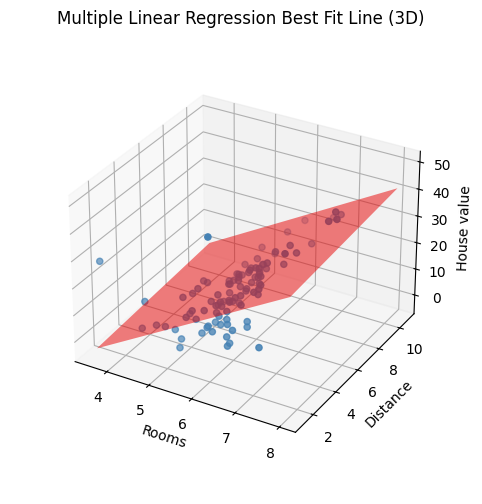

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# scatter plot of actual data
ax.scatter(X_test['rooms'], X_test['distance'],
           y_test, color='steelblue', label='Actual Data')

# create a meshgrid for the regression plane
x1_range = np.linspace(X_test['rooms'].min(), X_test['rooms'].max(), 100)
x2_range = np.linspace(X_test['distance'].min(), X_test['distance'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

# plot the regression plane
ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Rooms')
ax.set_ylabel('Distance')
ax.set_zlabel('House value')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

# scale the plot to ensure the label fits
ax.set_box_aspect(None, zoom=0.85)

plt.show()

## Evaluate the Model

Finally, we will evaluate the model's performance using the metrics Mean Squared Error (MSE) and R-squared score.

The Mean Squared Error is calculated as the average of the squared differences between the predicted and actual values. A lower MSE indicates a better fit of the model to the data.

Scikit-learn's `mean_squared_error` function calculates MSE.

The R-squared (coefficient of determination) score in `scikit-learn` is a metric used to evaluate the performance of regression models. It quantifies the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

Scikit-learn's `r2_score()` function calculates R-squared as:

$$R^2 = \frac {\mathrm{Residual \; Sum \; of \; Squares \; (SSE)}}{\mathrm{Total \; Sum \; of \; Squares \; (SST)}}$$

where
* SSE (Residual Sum of Squares): is the sum of the squared differences between the actual target values and the predicted target values.
* SST (Total Sum of Squares): is the sum of the squared differences between the actual target values and the mean of the actual target values.

In [9]:
# calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

Mean Squared Error: 44.381163869527676
R-squared score: 0.3948060231325965
